In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
df=pd.read_csv('dataset w7.csv')
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


# Carry out descriptive analytics on the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
df['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [7]:
df['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

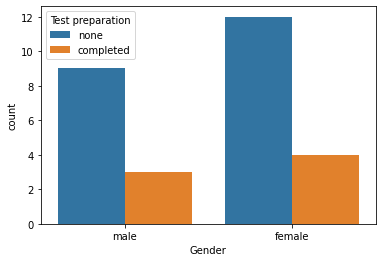

In [6]:
sns.countplot(x='Gender',hue='Test preparation', data=df)

In [12]:
df.groupby('Test preparation')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Test preparation,,,,,,,,
completed,7.0,44.571429,3.359422,40.0,43.0,44.0,46.0,50.0
none,21.0,28.238095,11.661495,12.0,18.0,27.0,38.0,48.0


In [10]:
df.groupby('Gender')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


In [13]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


# Check whether female and male students scored the same marks

#Setting Hypothesis
H0: female and male students did not score the same marks

H1: female and male students score the same marks.


In [14]:
# seperate male and female marks.
male = df[df['Gender']=='male']['Total Marks']
female = df[df['Gender']=='female']['Total Marks']
alpha = .05
# import ttset module
from scipy.stats import ttest_ind

In [15]:
stat,p = ttest_ind(male,female,equal_var=False)
print("p value:",p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value: 0.4906112127110316
Fail to reject H0.


From the above t test we fail to reject the Null Hypothesis. Hence we can say that, Female and Male scored different marks

# Whether test preparation helps the students?

alpha=0.05
H0 : Test preparation didn't help students

H1 : Test preparation helps students

In [19]:
tpn = df[df['Test preparation']=='none']['Total Marks']
tpc = df[df['Test preparation']=='completed']['Total Marks']
stat,p = ttest_ind(tpn,tpc,equal_var=False)
print("p value:",p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value: 4.884790752092096e-06
Reject H0


From the above t test we reject the Null Hypothesis. Hence we can say that, Test preparation helps students.